In [39]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-01-18 07:00:47--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-01-18 07:00:47 (22.5 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [41]:
#this proves that moore.csv has no headers
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [42]:
data= pd.read_csv('moore.csv',header=None)#.to_numpy()

In [43]:
data.shape

(162, 2)

In [44]:
type(data)

pandas.core.frame.DataFrame

In [45]:
data.to_numpy()

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [46]:
Y = data.iloc[:,1]

In [47]:
Y

0             2300
1             3500
2             2500
3             2500
4             4100
          ...     
157    18000000000
158    19200000000
159     8876000000
160    23600000000
161     9000000000
Name: 1, Length: 162, dtype: int64

In [48]:
X = data.iloc[:,0]

In [49]:
X

0      1971
1      1972
2      1973
3      1973
4      1974
       ... 
157    2017
158    2017
159    2018
160    2018
161    2018
Name: 0, Length: 162, dtype: int64

In [50]:
X.shape, Y.shape

((162,), (162,))

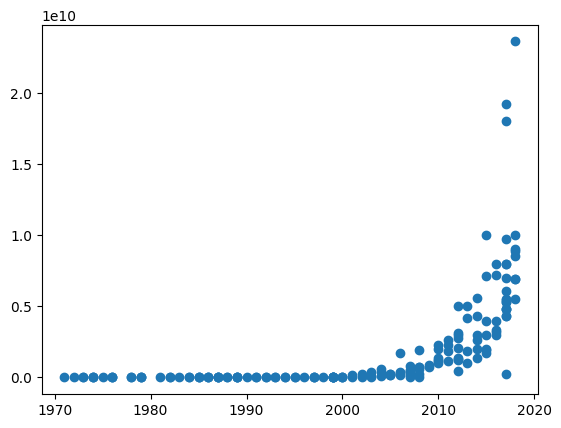

In [51]:
plt.scatter(X,Y)

In [52]:
Y = np.log(Y)

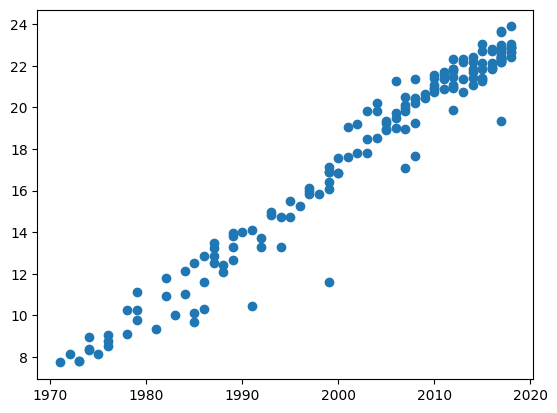

In [53]:
plt.scatter(X,Y)

In [54]:
X = X-X.mean() # we do it 0 mean---translate/shift data to form it to make 0 mean
# if we divide by  the standard deviation then ITS BASICALLY CALLED AS STANDARDISATION and
# if we divide then after predicting we would need to rescale it also
#trasfrom then transform back if divide else leave it as it is by froming 0 mean

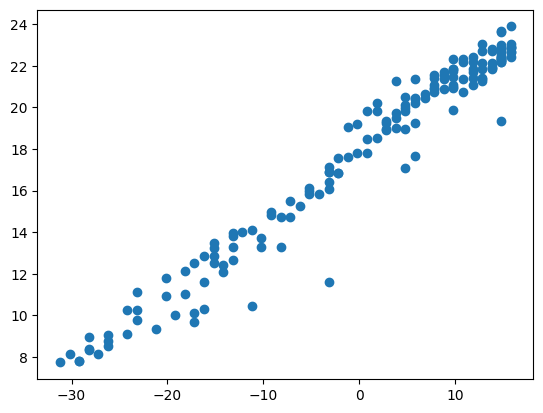

In [55]:
plt.scatter(X,Y)

In [56]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))#,activation='sigmoid')
])

In [57]:
model.compile(optimizer = tf.keras.optimizers.SGD(0.001,0.9), # lr,momentum
              # if used scaling then we could have used adam but beacuase not scaled
              #--- optimisation was harder and needed to use custom optimiser to get the exact vlaues as needed
              loss='mse'
              # accuracy nhi kyuki yaha pe classification into labels nhi par regression h toh accuracy is a wrong metric
              #,metrics=['accuracy']
              )

In [58]:
def schedule(epoch,lr):
  if epoch>=50 : return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [59]:
r = model.fit(X,Y,epochs = 100,callbacks=[scheduler])

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 424.4768 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 306.1639 - lr: 0.0010
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 264.1315 - lr: 0.0010
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 370.9608 - lr: 0.0010
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 404.2603 - lr: 0.0010
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 333.3568 - lr: 0.0010
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 213.5443 - lr: 0.0010
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 239.7722 - lr: 0.0010
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 258.9587 - lr: 0.0010
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 280.0316 - lr: 0.0010
Epoch 11/100
6/6 [==============================] - 0s 2ms/step - los

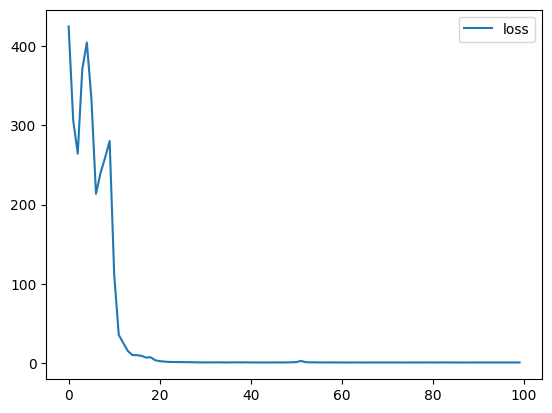

In [60]:
plt.plot(r.history['loss'],label='loss')
plt.legend()

In [61]:
model.layers

In [62]:
model.layers[0] #as its a list

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model.layers[0].get_weights() # bascially this is our slope and bias w and b

[array([[0.3538345]], dtype=float32), array([17.734838], dtype=float32)]

In [65]:
model.layers[0].get_weights()[0][0,0]

0.3538345

6/6 [==============================] - 0s 4ms/step


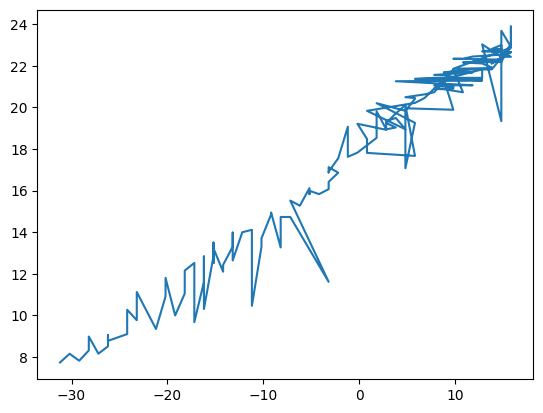

In [68]:
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)

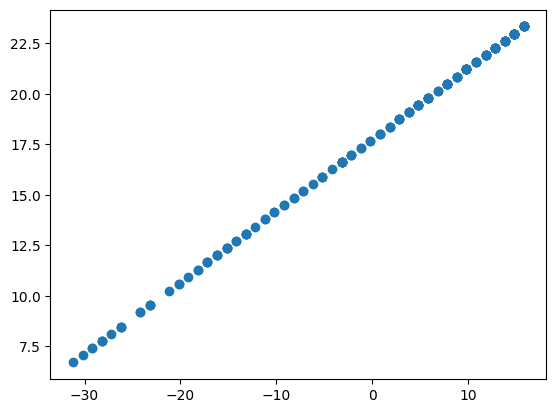

In [67]:
plt.scatter(X,Yhat)

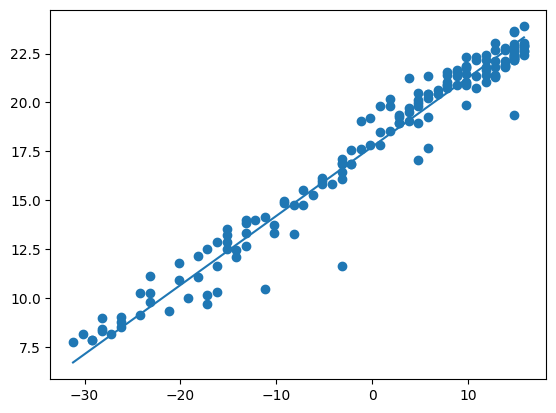

In [70]:
plt.scatter(X,Y)
plt.plot(X,Yhat)

In [ ]:
# we dont use == for accuracy of floating points as in linear regression np.mean(a==b)
# but we use np.allclose(Y==Yhat)